# Zadanie (przedziały ufności)

Znaleźć przedział ufności dla nieznanej wartości średniej $\mu$ populacji, w której badana cecha ma rozkład $N(\mu,\sigma)$, w przypadku gdy $\sigma$ jest znana, na podstawie $n$-elementowej próby prostej 
$$
X_1,\ldots,X_n.
$$

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

Wiemy, że statystyka 
$$
\bar X = \frac{1}{n} \sum_{i=1}^{n} X_i
$$
ma rozkład 
$$
N(\mu, \frac{\sigma}{\sqrt{n}}).
$$

Natomiast,  
$$
U = \frac{\bar X - \mu}{\sigma} \sqrt{n} 
$$
ma rozkład 
$$
N(0, 1).
$$

Zdefiniujmy zmienną losową o rozkładzie Normalnym

In [5]:
(mu, sigma)=(0,1)
X=stats.norm(mu, sigma)

Dla danego $\alpha$ ($0<\alpha<1$) możemy znaleść takie wartości $u_1$ i $u_1$, aby
$$
P( u_1<U<u_2 ) = CDF(u_2) - CDF(u_1) = 1-\alpha.
$$


In [24]:
alpha=0.05

Wystarczy w tym celu wybrać $\alpha_1$ i $\alpha_2$, takie, że spełniają one warunek:
$$
\alpha_1+\alpha_2 = \alpha, \qquad 0<\alpha_1<\alpha_1<\alpha
$$ 

i przyjąć
$$
u_1= PPF(\alpha_1), \qquad u_2= PPF(1 - \alpha_2)
$$
czyli kwantyle rzedu $\alpha_1$ i $1-\alpha_1$.

Wynika to z faktu, że
$$
CDF(PPF(1-\alpha_2)) - CDF(PPF(\alpha_1)) = 1-\alpha_2 - \alpha_1 = 1-\alpha
$$

\pause
Więc
$$
P( u_1<U<u_2 ) = CDF(u_2) - CDF(u_1) = 1-\alpha.
$$

# Zadanie 1
Wybierz kilka różnych $\alpha_1$ i $\alpha_2$ (tak aby $\alpha_1+\alpha_2= \alpha$) i narysuj przedział ufności:
<ul>
<li>$\alpha_1=0.02$ , $\alpha_2=\alpha- 0.02$</li>
<li>$\alpha_1=0.000001$ , $\alpha_2=\alpha- 0.000001$</li>
<li>$\alpha_1=0.5 * \alpha$ , $\alpha_2=0.5 * \alpha$</li>
</ul>

In [31]:
alpha_1=0.0000001
alpha_2=alpha-alpha_1

In [32]:
print(alpha_1+alpha_2)
print(alpha)

0.05
0.05


In [33]:
u_1=X.ppf(alpha_1)
u_2=X.ppf(1-alpha_2)
print(u_1)
print(u_2)

-5.1993375821928165
1.6448545965491732


In [34]:
(inte1,err1)=integrate.quad(lambda x: X.pdf(x), -np.inf, u_1)
print(np.round(inte1,4))
(inte2,err2)=integrate.quad(lambda x: X.pdf(x), u_2, np.inf)
print(np.round(inte2,4))
print(inte1+inte2)

0.0
0.05
0.05000000000000086


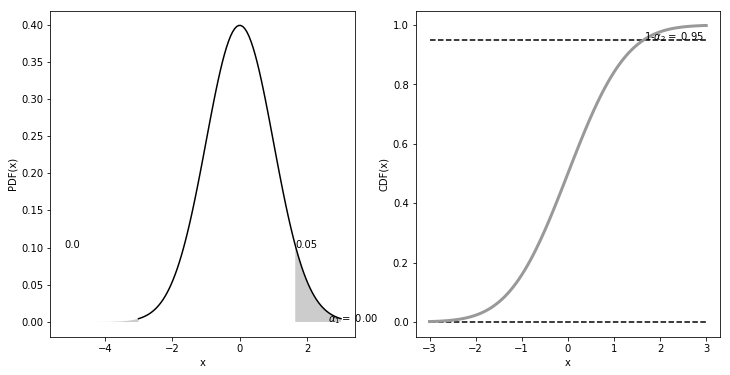

In [35]:
x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(-3, u_1)
y1 = X.pdf(x1)

x2 = np.linspace(u_2,3)
y2 = X.pdf(x2)

figs, axs = plt.subplots(1,2, figsize=(12, 6))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].fill_between(x2, y2, facecolor='#CCCCCC')
axs[0].text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs[0].text(u_2, 0.1, np.round(1-X.cdf(u_2),4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(u_1, X.cdf(u_1), r'$\alpha_1 = $ %.2f' % np.round(alpha_1,2))
axs[1].hlines(alpha_1, -3, 3, linestyles='--')
axs[1].text(u_2, X.cdf(u_2), r'1-$\alpha_2 = $ %.2f' % np.round(1-alpha_2,2))
axs[1].hlines(1-alpha_2, -3, 3, linestyles='--')
plt.show()


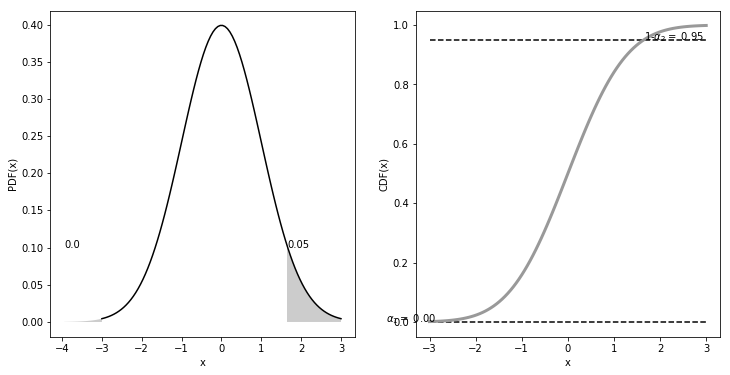

In [13]:
alpha_1=0.00004
alpha_2=alpha-alpha_1

u_1=X.ppf(alpha_1)
u_2=X.ppf(1-alpha_2)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(-3, u_1)
y1 = X.pdf(x1)

x2 = np.linspace(u_2,3)
y2 = X.pdf(x2)

figs, axs = plt.subplots(1,2, figsize=(12, 6))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].fill_between(x2, y2, facecolor='#CCCCCC')
axs[0].text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs[0].text(u_2, 0.1, np.round(1-X.cdf(u_2),4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(u_1, X.cdf(u_1), r'$\alpha_1 = $ %.2f' % np.round(alpha_1,2))
axs[1].hlines(alpha_1, -3, 3, linestyles='--')
axs[1].text(u_2, X.cdf(u_2), r'1-$\alpha_2 = $ %.2f' % np.round(1-alpha_2,2))
axs[1].hlines(1-alpha_2, -3, 3, linestyles='--')
plt.show()

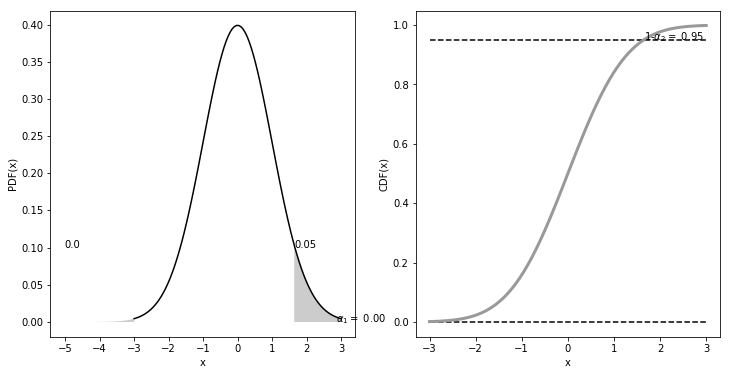

In [16]:
alpha_1=0.00000025
alpha_2=alpha-alpha_1

u_1=X.ppf(alpha_1)
u_2=X.ppf(1-alpha_2)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(-3, u_1)
y1 = X.pdf(x1)

x2 = np.linspace(u_2,3)
y2 = X.pdf(x2)

figs, axs = plt.subplots(1,2, figsize=(12, 6))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].fill_between(x2, y2, facecolor='#CCCCCC')
axs[0].text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs[0].text(u_2, 0.1, np.round(1-X.cdf(u_2),4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(u_1, X.cdf(u_1), r'$\alpha_1 = $ %.2f' % np.round(alpha_1,2))
axs[1].hlines(alpha_1, -3, 3, linestyles='--')
axs[1].text(u_2, X.cdf(u_2), r'1-$\alpha_2 = $ %.2f' % np.round(1-alpha_2,2))
axs[1].hlines(1-alpha_2, -3, 3, linestyles='--')
plt.show()

# Zadanie 2

Niech $\sigma=2$. Załóżmy, że w naszym zadaniu w $n=16$ próbach wypadło $\bar x = 34.1$.

Przyjmijmy współczynnik ufności $0.05$ wyznacz przedział największej wiarygodności:

$$
\left( \bar X - PPF(1-\frac{\alpha}{2}) \frac{\sigma}{\sqrt{n}} , \bar X + PPF(1-\frac{\alpha}{2}) \frac{\sigma}{\sqrt{n}} \right)
$$

In [11]:
alpha_1=0.025
alpha_2=alpha-alpha_1
n=16
s=2
bar_x=34.1

In [12]:
L=bar_x-X.ppf(1-alpha/2)*(s/np.sqrt(n))

In [13]:
R=bar_x+X.ppf(1-alpha/2)*(s/np.sqrt(n))

In [14]:
print(r'( %3.5f , %3.5f)' % (L,R))

( 33.12002 , 35.07998)


# Zadanie 3
Wykonaj zadanie za pomocą <tt>scipy</tt> i <tt>funkcji stats.norm.interval</tt>.

In [33]:
ci = stats.norm.interval(1-alpha, loc=bar_x, scale=s/np.sqrt(n))
ci

(33.120018007729975, 35.079981992270028)

In [ ]:
np.std(data,ddof=1)